<a href="https://colab.research.google.com/github/finesketch/data_science/blob/main/Data_Science_from_Scratch/05_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np

num_friends = np.random.randint(1, 101, 1000)

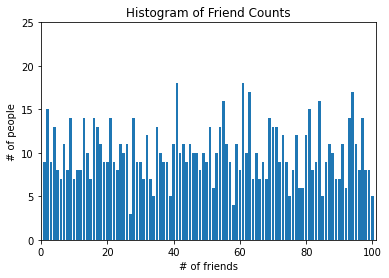

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

In [ ]:
num_points = len(num_friends)
num_points

1000

In [ ]:
largest_value = max(num_friends)
largest_value

100

In [ ]:
smallest_value = min(num_friends)
smallest_value

1

In [ ]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]         # 1
second_smallest_value = sorted_values[1]  # 1
second_largest_value = sorted_values[-10]  # 99

In [6]:
def mean(xs):
  return sum(xs) / len(xs)

mean(num_friends)

50.217

In [ ]:
# The underscores indicate that these are "private" functions, as they're
# intended to be called by our median function but not by other people
# using our statistics library.

def _median_odd(xs):
  """If len(xs) is odd, the median is the middle element"""
  return sorted(xs)[len(xs) // 2]

def _median_even(xs):
  """If len(xs) is even, it's the average of the middle two elements"""
  sorted_xs = sorted(xs)
  hi_midpoint = len(xs) // 2
  return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(xs):
  """Finds the 'middle-most' value of v"""
  return _median_even(xs) if len(xs) % 2 == 0 else _median_odd(xs)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [ ]:
print(median(num_friends))

50.0


In [ ]:
def quantile(xs, p):
  """Returns the pth-percentile value in x"""
  p_index = int(p * len(xs))
  return sorted(xs)[p_index]

#assert quantile(num_friends, 0.10) == 1
#assert quantile(num_friends, 0.25) == 3
#assert quantile(num_friends, 0.75) == 9
#assert quantile(num_friends, 0.90) == 13

In [ ]:
print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.50))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.90))

10
26
50
74
91


In [ ]:
def mode(x):
  """Returns a list, since there might be more than one mode"""
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items() if count == max_count]

print(mode(num_friends))

[85]


In [ ]:
def data_range(xs):
  # "range" already means something in Python, so we'll use a different name
  return max(xs) - min(xs)

from data_range(num_friends)

99

In [22]:
from functools import reduce

def sum_of_squares(test_list):
  # printing original list 
  print ("The original list is : " + str(test_list))
    
  # using reduce() + lambda
  # sum of squares 
  res = reduce(lambda i, j: i + j * j, [test_list[:1][0]**2]+test_list[1:])
    
  # printing result
  print ("The sum of squares of list is : " + str(res))

  return res

def de_mean(xs):
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs):
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    sos = sum_of_squares(deviations)
    nn = n - 1
    print(sos)
    print(nn)
    return sos / nn


print(f'variance(num_friends): {variance(num_friends)}')

#assert 81.54 < variance(num_friends) < 1000

The original list is : [18.295, 18.295, -28.705, -27.705, -48.705, -45.705, -10.704999999999998, 29.295, 0.2950000000000017, -25.705, 43.295, -28.705, -19.705, -24.705, 11.295000000000002, 22.295, 20.295, 3.2950000000000017, 46.295, 46.295, -30.705, -45.705, -18.705, 23.295, -30.705, -7.704999999999998, -23.705, -13.704999999999998, 32.295, -42.705, -37.705, -36.705, 43.295, -48.705, 40.295, -10.704999999999998, -20.705, -6.704999999999998, -33.705, -35.705, 7.295000000000002, -22.705, 17.295, 38.295, 13.295000000000002, -46.705, 24.295, -28.705, 44.295, 35.295, -28.705, -18.705, -19.705, -21.705, -15.704999999999998, -40.705, 22.295, 20.295, 18.295, 27.295, 5.295000000000002, -37.705, 3.2950000000000017, -37.705, -42.705, -3.7049999999999983, -28.705, 12.295000000000002, -12.704999999999998, 42.295, 28.295, -24.705, -6.704999999999998, 14.295000000000002, 42.295, 49.295, -17.705, 35.295, 9.295000000000002, -42.705, 20.295, 9.295000000000002, -25.705, -24.705, 39.295, 16.295, -40.705, 

In [23]:
import math

def standard_deviation(xs):
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

print(f'standard_deviation(num_friends): {standard_deviation(num_friends)}')

#assert 9.02 < standard_deviation(num_friends) < 9.04

The original list is : [18.295, 18.295, -28.705, -27.705, -48.705, -45.705, -10.704999999999998, 29.295, 0.2950000000000017, -25.705, 43.295, -28.705, -19.705, -24.705, 11.295000000000002, 22.295, 20.295, 3.2950000000000017, 46.295, 46.295, -30.705, -45.705, -18.705, 23.295, -30.705, -7.704999999999998, -23.705, -13.704999999999998, 32.295, -42.705, -37.705, -36.705, 43.295, -48.705, 40.295, -10.704999999999998, -20.705, -6.704999999999998, -33.705, -35.705, 7.295000000000002, -22.705, 17.295, 38.295, 13.295000000000002, -46.705, 24.295, -28.705, 44.295, 35.295, -28.705, -18.705, -19.705, -21.705, -15.704999999999998, -40.705, 22.295, 20.295, 18.295, 27.295, 5.295000000000002, -37.705, 3.2950000000000017, -37.705, -42.705, -3.7049999999999983, -28.705, 12.295000000000002, -12.704999999999998, 42.295, 28.295, -24.705, -6.704999999999998, 14.295000000000002, 42.295, 49.295, -17.705, 35.295, 9.295000000000002, -42.705, 20.295, 9.295000000000002, -25.705, -24.705, 39.295, 16.295, -40.705, 